In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Google ColabÏóêÏÑú ÌïúÍ∏Ä ÌëúÏãúÏö©)
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

print("=== Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏãúÏûë ===\n")

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    # Google ColabÏóêÏÑú ÌååÏùºÏùÑ ÏóÖÎ°úÎìúÌïú Í≤ΩÏö∞
    df = pd.read_csv('/content/final_dataset_integrated_features.csv', encoding = 'utf-8')
    print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏÑ±Í≥µ!")
except:
    print("‚ùå Error - No data found")
    exit()

# Î≤îÏ£ÑÎ∞ÄÎèÑ Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùå
df.drop('Crime_Density', axis=1, inplace=True)

print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"Ïª¨ÎüºÎ™Ö: {list(df.columns)}")
print("\n=== Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞ ===")
print(df.head(25))

=== Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏãúÏûë ===

‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏÑ±Í≥µ!
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25, 6)
Ïª¨ÎüºÎ™Ö: ['District', 'PopDensity_12_18`', 'GVA', 'Family_Happiness_Index', 'Pub_Density', 'Avg_Lux']

=== Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞ ===
        District  PopDensity_12_18`       GVA  Family_Happiness_Index  \
0        Gangnam        8248.490223  70453710                    6.94   
1       Gangdong        4980.691170   8546013                    7.13   
2        Gangbuk        2961.868299   3147933                    6.90   
3        Gangseo        3664.075486  17025623                    6.45   
4         Gwanak        4520.002598   5893427                    6.70   
5       Gwangjin        6354.047956   6027026                    6.55   
6           Guro        5455.625447  13424370                    6.55   
7      Geumcheon        5829.893745  16353849                    6.43   
8          Nowon        3476.304711   6203918                    7.21   
9         Dobong        3003.8

In [3]:
"""**2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**"""

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
print("\n=== Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ===")

# Ïà´ÏûêÍ∞Ä ÏïÑÎãå Í∞íÎì§ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (ÏâºÌëú Ï†úÍ±∞ Îì±)
for col in df.columns:
    if col != df.columns[0]:  # Ï≤´ Î≤àÏß∏ Ïª¨Îüº(ÏßÄÏó≠Î™Ö)ÏùÄ Ï†úÏô∏
        if df[col].dtype == 'object':
            # ÏâºÌëú Ï†úÍ±∞ÌïòÍ≥† Ïà´ÏûêÎ°ú Î≥ÄÌôò
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Í≤∞Ï∏°Í∞í ÌôïÏù∏
print("Í≤∞Ï∏°Í∞í ÌôïÏù∏:")
print(df.isnull().sum())

# Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎã§Î©¥ ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)

"""**3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏÑ§Ï†ï**"""

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÌäπÏÑ± ÏÑ†ÌÉù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌäπÏÑ± ÏÑ†ÌÉù ===")

# Ï≤´ Î≤àÏß∏ Ïª¨Îüº(ÏßÄÏó≠Î™Ö)ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Ïà´Ïûê Ïª¨Îüº ÏÇ¨Ïö©
region_col = df.columns[0]
feature_cols = [col for col in df.columns if col != region_col and df[col].dtype in ['int64', 'float64']]

print(f"ÏÇ¨Ïö©Ìï† ÌäπÏÑ±Îì§: {feature_cols}")
print(f"Ï¥ù ÌäπÏÑ± Í∞úÏàò: {len(feature_cols)}")

# ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
X = df[feature_cols].values
region_names = df[region_col].values


=== Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ===
Í≤∞Ï∏°Í∞í ÌôïÏù∏:
District                  0
PopDensity_12_18`         0
GVA                       0
Family_Happiness_Index    0
Pub_Density               0
Avg_Lux                   0
dtype: int64

=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌäπÏÑ± ÏÑ†ÌÉù ===
ÏÇ¨Ïö©Ìï† ÌäπÏÑ±Îì§: ['PopDensity_12_18`', 'GVA', 'Family_Happiness_Index', 'Pub_Density', 'Avg_Lux']
Ï¥ù ÌäπÏÑ± Í∞úÏàò: 5



=== Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî ===
ÌëúÏ§ÄÌôî ÏôÑÎ£å!
ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (25, 5)

=== Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ ===


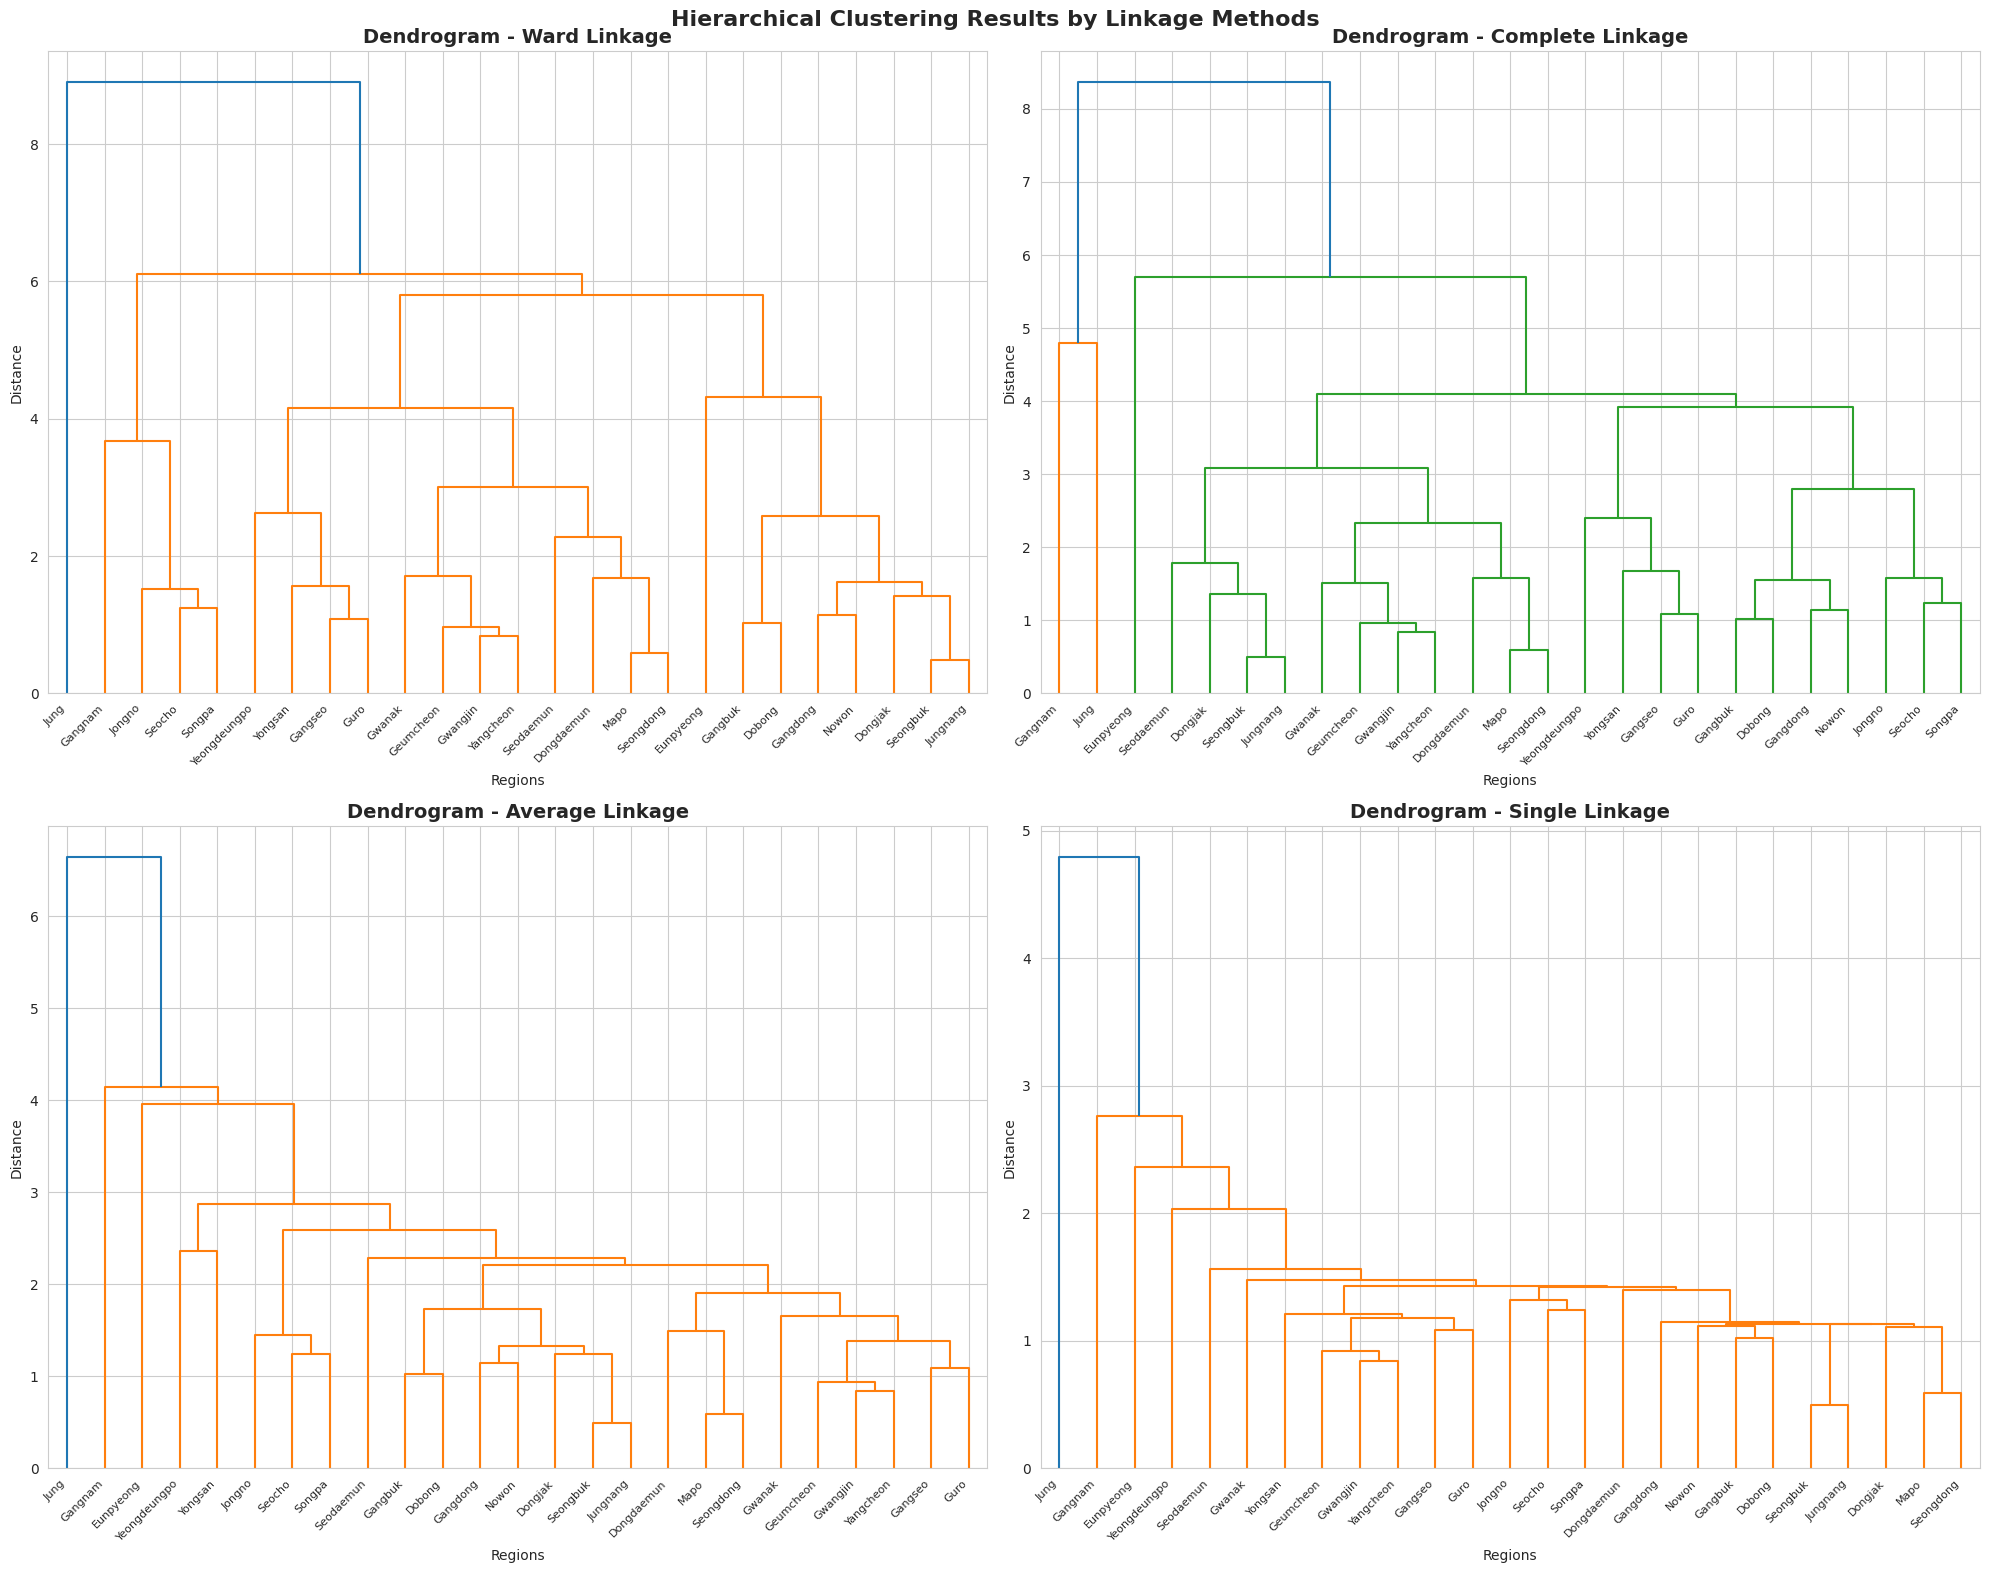

In [4]:
# 4. Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
print("\n=== Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî ===")
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)

print("ÌëúÏ§ÄÌôî ÏôÑÎ£å!")
print(f"ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_scaled.shape}")

"""**5. Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ**"""

# 5. Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ
print("\n=== Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ ===")

# Í±∞Î¶¨ ÌñâÎ†¨ Í≥ÑÏÇ∞ (Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ ÏÇ¨Ïö©)
distances = pdist(X_scaled, metric='euclidean')

# Ïó∞Í≤∞ Î∞©Î≤ïÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

dendrograms = {}

for i, method in enumerate(linkage_methods):
    # Ïó∞Í≤∞ ÌñâÎ†¨ Í≥ÑÏÇ∞
    Z = linkage(distances, method=method)
    dendrograms[method] = Z

    # Îç¥ÎìúÎ°úÍ∑∏Îû® Í∑∏Î¶¨Í∏∞
    plt.subplot(2, 2, i+1)
    dendrogram(Z, labels=region_names, orientation='top', leaf_rotation=90)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=14, fontweight='bold')
    plt.xlabel('Regions')
    plt.ylabel('Distance')
    plt.xticks(rotation=45, ha='right', fontsize=8)

plt.suptitle('Hierarchical Clustering Results by Linkage Methods', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


=== ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 2: Ïã§Î£®Ïó£ Ï†êÏàò = 0.584, WCSS = 85.36
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 3: Ïã§Î£®Ïó£ Ï†êÏàò = 0.246, WCSS = 66.67
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 4: Ïã§Î£®Ïó£ Ï†êÏàò = 0.215, WCSS = 49.85
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 5: Ïã§Î£®Ïó£ Ï†êÏàò = 0.199, WCSS = 40.53
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 6: Ïã§Î£®Ïó£ Ï†êÏàò = 0.193, WCSS = 31.92
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 7: Ïã§Î£®Ïó£ Ï†êÏàò = 0.206, WCSS = 25.16


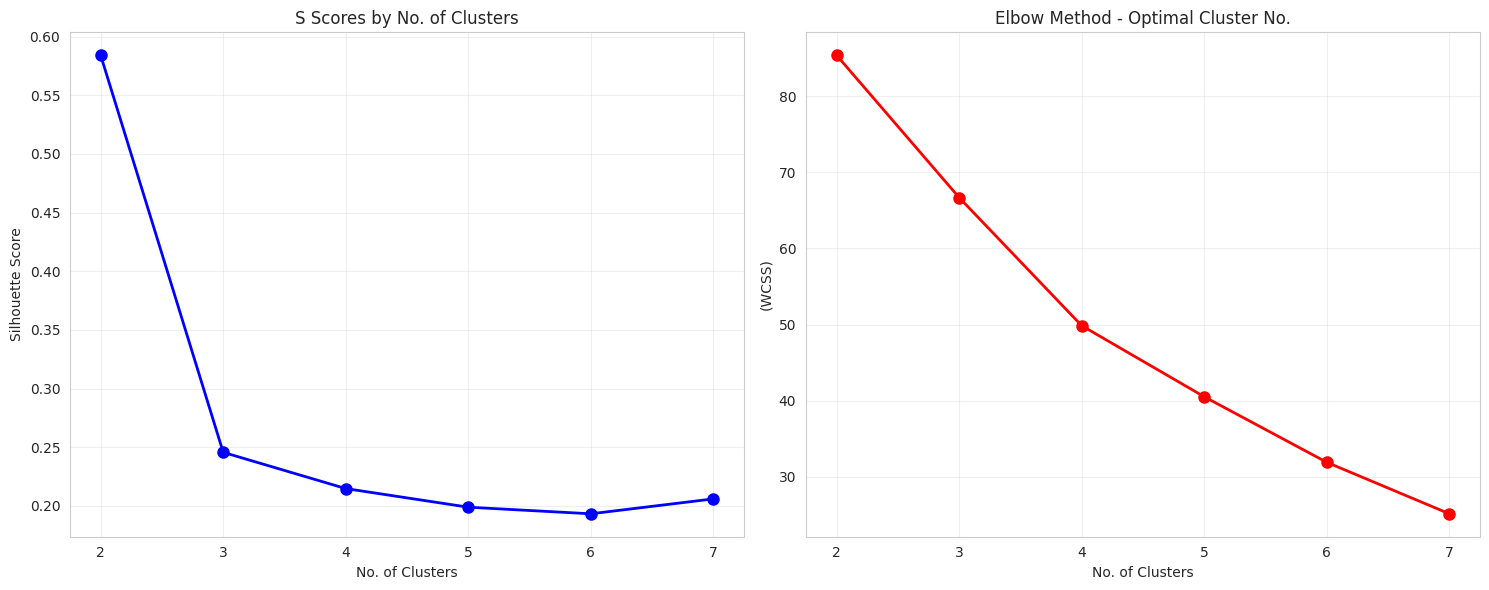

In [5]:
"""**6. ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï**"""

# 6. ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï (Ward Î∞©Î≤ï ÏÇ¨Ïö©)
print("\n=== ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï ===")

# Ward Î∞©Î≤ïÏùò Ïó∞Í≤∞ ÌñâÎ†¨ ÏÇ¨Ïö©
Z_ward = dendrograms['ward']

# Ïó¨Îü¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏóê ÎåÄÌï¥ Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
cluster_range = range(2, min(8, len(region_names)))
silhouette_scores = []
inertias = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ Î∂ÑÏÇ∞ Í≥ÑÏÇ∞ (WCSS)
    wcss = 0
    for i in range(n_clusters):
        cluster_points = X_scaled[cluster_labels == i]
        if len(cluster_points) > 0:
            cluster_center = np.mean(cluster_points, axis=0)
            wcss += np.sum((cluster_points - cluster_center) ** 2)
    inertias.append(wcss)

    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò {n_clusters}: Ïã§Î£®Ïó£ Ï†êÏàò = {silhouette_avg:.3f}, WCSS = {wcss:.2f}")

# Ïã§Î£®Ïó£ Ï†êÏàòÏôÄ ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï Í∑∏ÎûòÌîÑ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ïã§Î£®Ïó£ Ï†êÏàò Í∑∏ÎûòÌîÑ
ax1.plot(cluster_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('No. of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('S Scores by No. of Clusters')
ax1.grid(True, alpha=0.3)

# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï Í∑∏ÎûòÌîÑ
ax2.plot(cluster_range, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('No. of Clusters')
ax2.set_ylabel('(WCSS)')
ax2.set_title('Elbow Method - Optimal Cluster No.')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏÑ†ÌÉù
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

# (option) 4Í∞ú ClusterÎ°ú ÏßÑÌñâ
# optimal_clusters = 4
print(f"\nüìä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_clusters} (Ïã§Î£®Ïó£ Ï†êÏàò: {max(silhouette_scores):.3f})")

"""**7. ÏµúÏ¢Ö ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ**"""

# 7. ÏµúÏ¢Ö ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
print("\n=== ÏµúÏ¢Ö ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ ===")

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
final_clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels = final_clusterer.fit_predict(X_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_result = df.copy()
df_result['Cluster'] = final_labels

print(f"‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å! Ï¥ù {optimal_clusters}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÎ•ò")

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏßÄÏó≠ ÌôïÏù∏
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏßÄÏó≠ Î∂ÑÎ•ò ===")
for i in range(optimal_clusters):
    cluster_regions = df_result[df_result['Cluster'] == i][region_col].values
    print(f"üè∑Ô∏è  ÌÅ¥Îü¨Ïä§ÌÑ∞ {i+1}: {list(cluster_regions)} ({len(cluster_regions)}Í∞ú ÏßÄÏó≠)")


üìä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2 (Ïã§Î£®Ïó£ Ï†êÏàò: 0.584)

=== ÏµúÏ¢Ö ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ ===
‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å! Ï¥ù 2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÎ•ò

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏßÄÏó≠ Î∂ÑÎ•ò ===
üè∑Ô∏è  ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: ['Gangnam', 'Gangdong', 'Gangbuk', 'Gangseo', 'Gwanak', 'Gwangjin', 'Guro', 'Geumcheon', 'Nowon', 'Dobong', 'Dongdaemun', 'Dongjak', 'Mapo', 'Seodaemun', 'Seocho', 'Seongdong', 'Seongbuk', 'Songpa', 'Yangcheon', 'Yeongdeungpo', 'Yongsan', 'Eunpyeong', 'Jongno', 'Jungnang'] (24Í∞ú ÏßÄÏó≠)
üè∑Ô∏è  ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: ['Jung'] (1Í∞ú ÏßÄÏó≠)



=== PCAÎ•º ÌÜµÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî ===
PC1 ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: 0.501 (50.1%)
PC2 ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: 0.213 (21.3%)
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: 0.715 (71.5%)


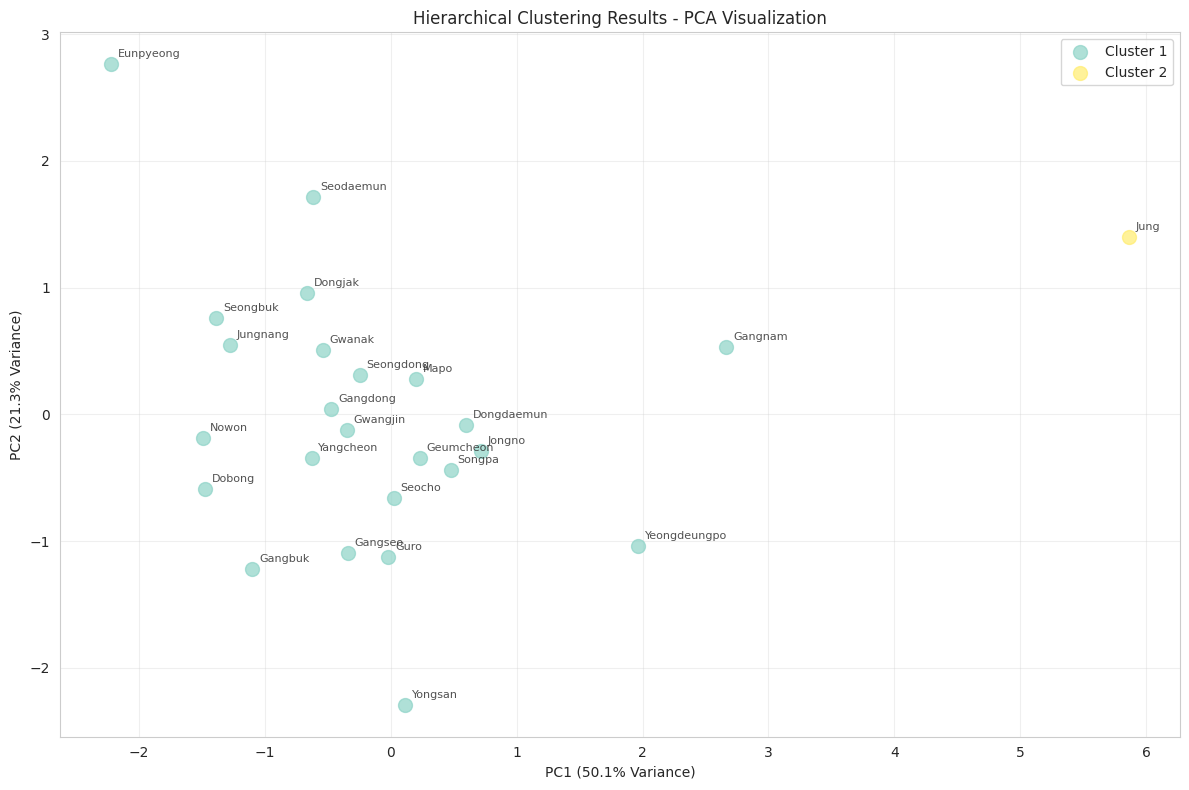

In [7]:
"""**8. PCAÎ•º ÌÜµÌïú ÏãúÍ∞ÅÌôî**"""

# 8. PCAÎ•º ÌÜµÌïú 2D ÏãúÍ∞ÅÌôî
print("\n=== PCAÎ•º ÌÜµÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî ===")

# PCAÎ°ú 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®
explained_variance = pca.explained_variance_ratio_
print(f"PC1 ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"PC2 ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, optimal_clusters))

for i in range(optimal_clusters):
    cluster_mask = final_labels == i
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
               c=[colors[i]], label=f'Cluster {i+1}', s=100, alpha=0.7)

    # ÏßÄÏó≠Î™Ö ÌëúÏãú
    for j, region in enumerate(region_names[cluster_mask]):
        plt.annotate(region, (X_pca[cluster_mask, 0][j], X_pca[cluster_mask, 1][j]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)')
plt.title('Hierarchical Clustering Results - PCA Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù ===


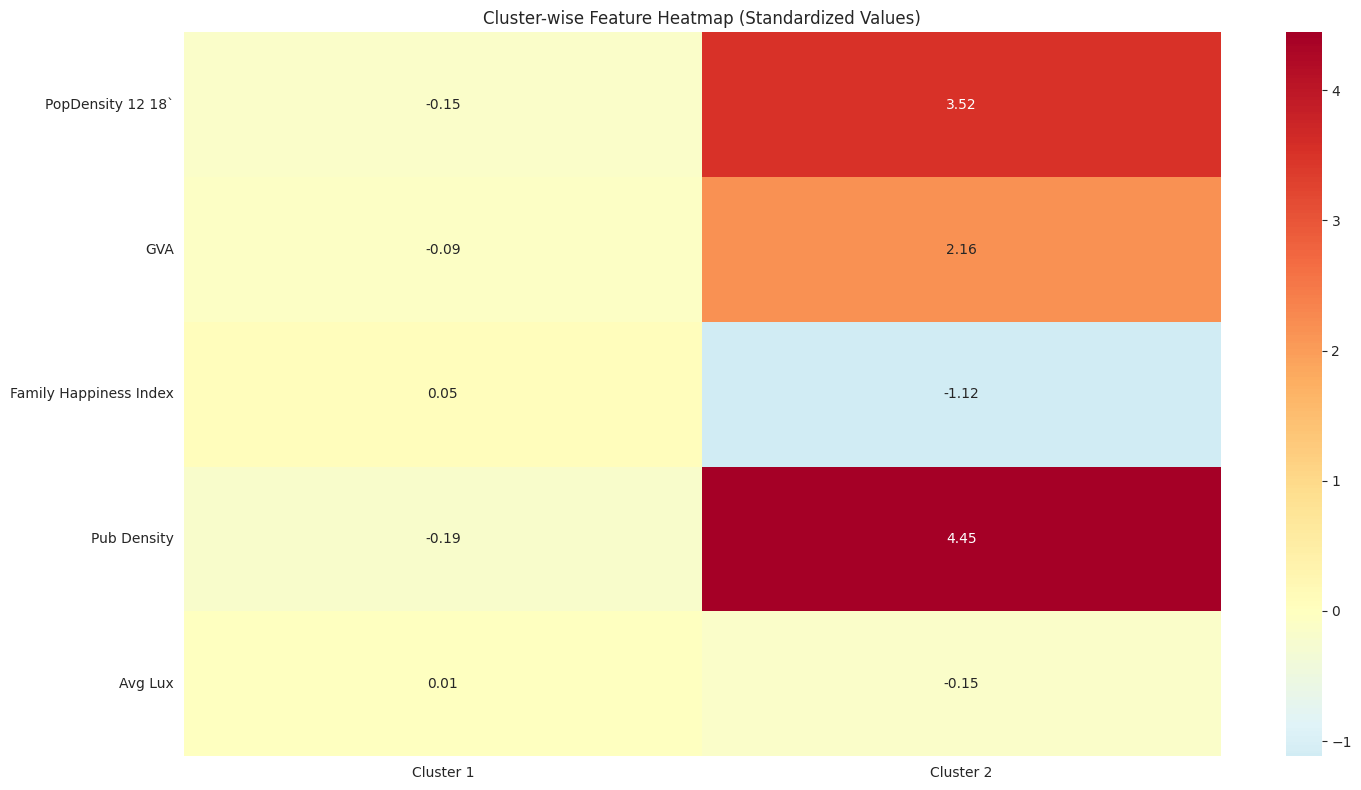


=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†Í∞í ===
         PopDensity_12_18`         GVA  Family_Happiness_Index  Pub_Density  \
Cluster                                                                       
0                  5350.11  15492761.5                    6.87         6.88   
1                 12840.14  53162829.0                    6.50        65.50   

         Avg_Lux  
Cluster           
0        4944.90  
1        4799.58  


In [8]:
"""**9. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌäπÏÑ± Î∂ÑÏÑù**"""

# 9. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù ===")

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨Í∞í Í≥ÑÏÇ∞
cluster_centers = []
for i in range(optimal_clusters):
    cluster_mask = final_labels == i
    cluster_center = np.mean(X_scaled[cluster_mask], axis=0)
    cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌûàÌä∏Îßµ
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_centers.T,
           xticklabels=[f'Cluster {i+1}' for i in range(optimal_clusters)],
           yticklabels=[col.replace('_', ' ') for col in feature_cols],  # Ïª¨ÎüºÎ™Ö Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ
           annot=True, fmt='.2f', cmap='RdYlBu_r', center=0)
plt.title('Cluster-wise Feature Heatmap (Standardized Values)')
plt.tight_layout()
plt.show()

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†Í∞í ===")
cluster_stats = df_result.groupby('Cluster')[feature_cols].mean()
print(cluster_stats.round(2))


=== Ïã§Î£®Ïó£ Î∂ÑÏÑù ===
ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.584


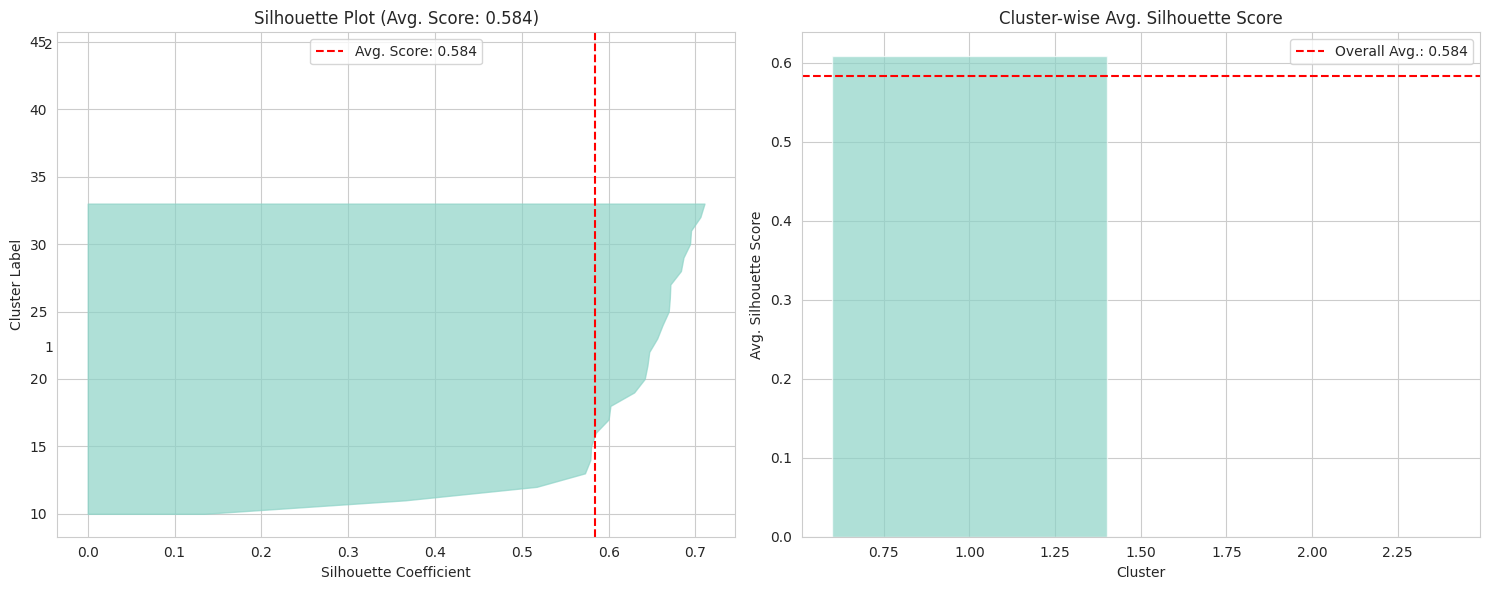

In [9]:
# 10. Ïã§Î£®Ïó£ Î∂ÑÏÑù
print("\n=== Ïã§Î£®Ïó£ Î∂ÑÏÑù ===")

# Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
silhouette_avg = silhouette_score(X_scaled, final_labels)
sample_silhouette_values = silhouette_samples(X_scaled, final_labels)

print(f"ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")

# Ïã§Î£®Ïó£ ÌîåÎ°Ø
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ïã§Î£®Ïó£ ÌîåÎ°Ø
y_lower = 10
colors = plt.cm.Set3(np.linspace(0, 1, optimal_clusters))

for i in range(optimal_clusters):
    cluster_silhouette_values = sample_silhouette_values[final_labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10

ax1.set_xlabel('Silhouette Coefficient')
ax1.set_ylabel('Cluster Label')
ax1.set_title(f'Silhouette Plot (Avg. Score: {silhouette_avg:.3f})')

# ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò ÌëúÏãú
ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
           label=f'Avg. Score: {silhouette_avg:.3f}')
ax1.legend()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïã§Î£®Ïó£ Ï†êÏàò Î∂ÑÌè¨
cluster_silhouette_scores = []
for i in range(optimal_clusters):
    cluster_scores = sample_silhouette_values[final_labels == i]
    cluster_silhouette_scores.append(cluster_scores.mean())

ax2.bar(range(1, optimal_clusters+1), cluster_silhouette_scores,
        color=colors, alpha=0.7)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Avg. Silhouette Score')
ax2.set_title('Cluster-wise Avg. Silhouette Score')
ax2.axhline(y=silhouette_avg, color="red", linestyle="--",
           label=f'Overall Avg.: {silhouette_avg:.3f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
# ÏöîÏïΩ Ï†ïÎ≥¥ Ï∂úÎ†•
print("\n" + "="*50)
print("üéØ Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏôÑÎ£å!")
print("="*50)
print(f"üìä Ï¥ù Î∂ÑÏÑù ÏßÄÏó≠ Ïàò: {len(region_names)}")
print(f"üéØ ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_clusters}")
print(f"üìà ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")
print(f"üîç PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: {sum(explained_variance)*100:.1f}%")

print("\nüìã ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏïΩ:")
for i in range(optimal_clusters):
    cluster_regions = df_result[df_result['Cluster'] == i][region_col].values
    cluster_silhouette = cluster_silhouette_scores[i]
    print(f"   ÌÅ¥Îü¨Ïä§ÌÑ∞ {i+1}: {len(cluster_regions)}Í∞ú ÏßÄÏó≠ (Ïã§Î£®Ïó£: {cluster_silhouette:.3f})")
    print(f"      ‚Üí {', '.join(cluster_regions)}")

print("\n‚úÖ Î™®Îì† Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print("="*50)


üéØ Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏôÑÎ£å!
üìä Ï¥ù Î∂ÑÏÑù ÏßÄÏó≠ Ïàò: 25
üéØ ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2
üìà ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.584
üîç PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®: 71.5%

üìã ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏïΩ:
   ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: 24Í∞ú ÏßÄÏó≠ (Ïã§Î£®Ïó£: 0.608)
      ‚Üí Gangnam, Gangdong, Gangbuk, Gangseo, Gwanak, Gwangjin, Guro, Geumcheon, Nowon, Dobong, Dongdaemun, Dongjak, Mapo, Seodaemun, Seocho, Seongdong, Seongbuk, Songpa, Yangcheon, Yeongdeungpo, Yongsan, Eunpyeong, Jongno, Jungnang
   ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: 1Í∞ú ÏßÄÏó≠ (Ïã§Î£®Ïó£: 0.000)
      ‚Üí Jung

‚úÖ Î™®Îì† Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!
